In [24]:
%pylab inline
import numpy as np
import pandas as pd
import cPickle as pickle
import seaborn as sns
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [25]:
data = pickle.load(open("../data/mushroombody.KC-MBON.rosette.mats.pickle", 'r'))

In [65]:
thold_tgt = 20
d = data['mats'][thold_tgt]
data_mat=d['mat']

In [66]:
# what is the sparsity
sparsity_percent = data_mat.sum() / float(np.prod(data_mat.shape)) * 100
print "The source matrix is ", sparsity_percent, "% sparse"

The source matrix is  0.201456766776 % sparse


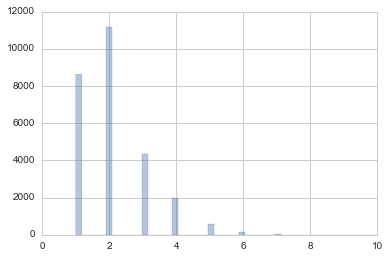

In [67]:
sns.distplot(data_mat.sum(axis=1), kde=False)

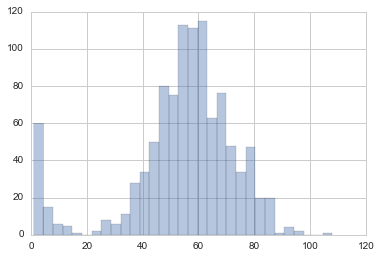

In [30]:
sns.distplot(data_mat.sum(axis=0), kde=False)

In [33]:
data_mat_f = data_mat.astype(np.float32)
U, s, V = np.linalg.svd(data_mat_f) 

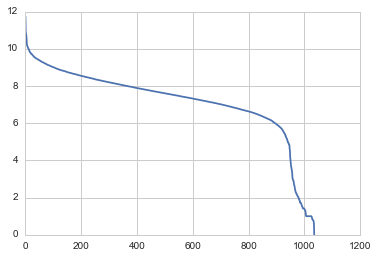

In [37]:
pylab.plot(s)

In [55]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


##############################################################################
# Compute DBSCAN
subset = np.random.permutation(len(data_mat_f))[:7000]
subset_data = data_mat_f[subset]
db = DBSCAN(eps=0.03, min_samples=10).fit(subset_data)

In [56]:
labels = db.labels_
ci = np.argsort(labels).flatten()
sorted_data = subset_data[ci]

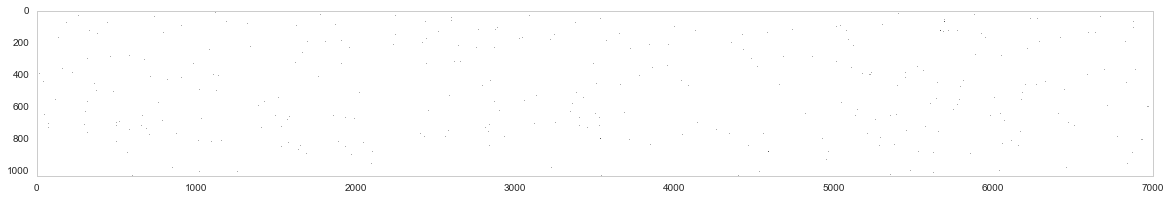

In [49]:
pylab.figure(figsize=(20, 4))
pylab.imshow(sorted_data.T, interpolation='nearest', cmap=pylab.cm.gray_r)
pylab.grid(False)

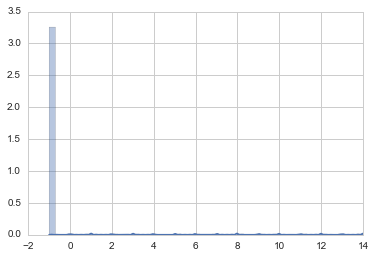

In [57]:
sns.distplot(labels)

In [63]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
print("Computing PCA projection")
X_pca = manifold.SpectralEmbedding(n_components=2).fit_transform(subset_data)
#plot_embedding(X_pca,
#               "Principal Components projection of the digits (time %.2fs)" %
#               (time() - t0))

Computing PCA projection


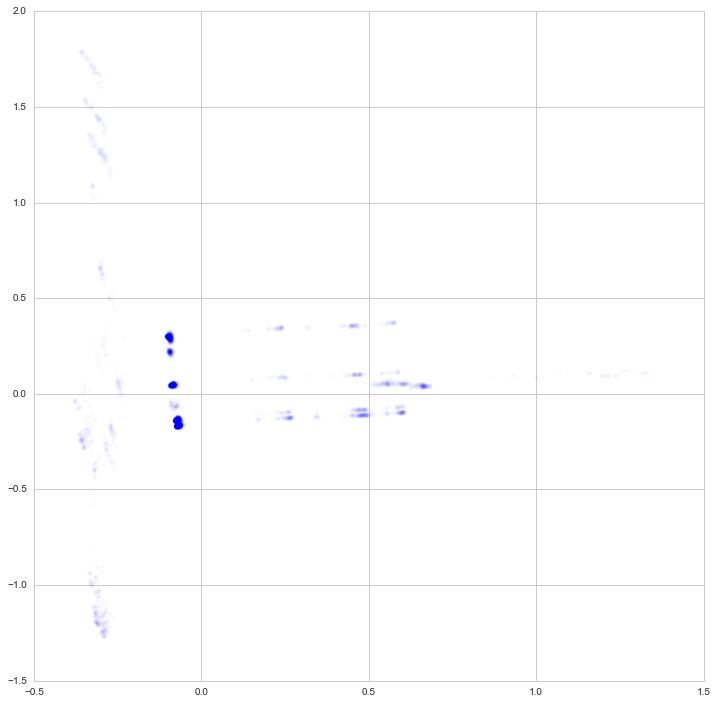

In [64]:
pylab.figure(figsize=(12, 12))
pylab.scatter(X_pca[:, 0], X_pca[:, 1],edgecolor='none', cmap=pylab.cm.jet, alpha=0.01)